## Plot ED Fig. 1e

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmocean

import pickle
import sys, os
sys.path.append('../utils')
from db import get_db_info, select_db, execute_sql

In [7]:
name = 'AL41'
file_date_id = '20211102'
paths = get_db_info()
facemap_path = os.path.join(paths['facemap_root'], name, file_date_id, '_'.join([name, file_date_id, 'proc.npy']))
# os.listdir(facemap_path)
facemap = np.load(facemap_path, allow_pickle=True).item()

In [8]:
facemap['motMask_reshape'][1].shape

(162, 309, 500)

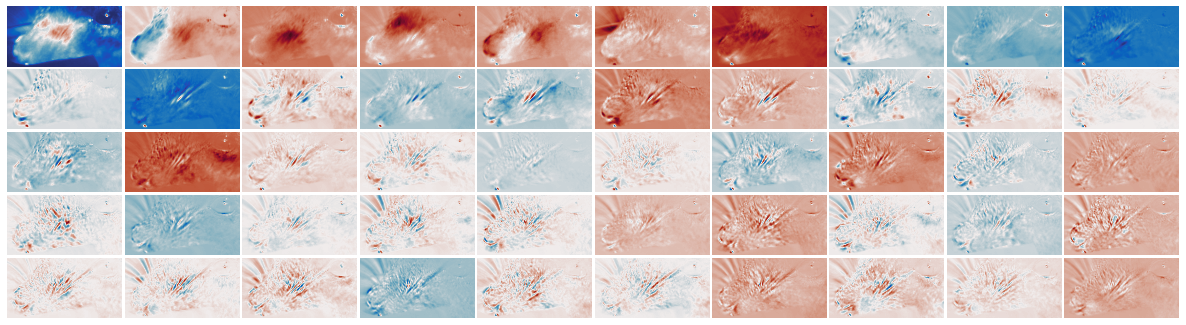

In [9]:
nrows = 5
ncols = 10

img_cmap = cmocean.tools.crop(cmocean.cm.balance, vmin=-0.14, vmax=0.15, pivot=0)

plt.figure(figsize = (ncols*2.1,nrows*1.15))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(nrows*ncols):
    ax1 = plt.subplot(gs1[i])
    ax1.imshow(facemap['motMask_reshape'][1][..., i], cmap=img_cmap)
    plt.axis('off')

plt.savefig('figs/facemap_example_{}_{}.svg'.format(name, file_date_id))
plt.savefig('figs/facemap_example_{}_{}.pdf'.format(name, file_date_id))